The following are descriptions of various musical attributes and classification categories in our Dataset:


Popularity:
   * The popularity of a track is quantified on a scale of 0 to 100, with 100 representing the highest popularity. It is calculated algorithmically based on the total number of plays and the recency of those plays. Popularity ratings may be influenced by the current play trends, with songs receiving more plays having higher popularity scores. The popularity of an artist or album is derived mathematically from the popularity of individual tracks. Please note that the popularity value may not reflect real-time popularity updates and can have a slight delay.



Danceability:
   * Danceability refers to the suitability of a track for dancing, considering factors such as tempo, rhythm stability,         beat strength, and overall regularity.


Energy:
   * Energy represents a subjective measure of intensity and activity in a track. Energetic tracks are typically fast,     loud,and vibrant. For example, genres like death metal are characterized by high energy, while a Bach prelude would score low on the energy scale.
   
   
   
Key:
  *  Key represents the estimated overall musical key of a track. Integers are used to map pitches using standard Pitch Class notation. For example, 0 corresponds to C, 1 corresponds to C♯/D♭, 2 corresponds to D, and so on.  
  
  
Loudness:
   * Loudness refers to the overall volume level of a track, measured in decibels (dB). It provides a means of comparing the relative loudness of different tracks by averaging the loudness values across the entire track.  
   
   
   
Mode:
  *  Mode indicates the modality of a track, whether it is in a major or minor key. Major is represented by 1, while minor is represented by 0.  
  
  
  
Speechiness:
  *  Speechiness detects the presence of spoken words in a track. A value close to 1.0 indicates a recording primarily consisting of speech-like elements, such as talk shows, audio books, or poetry.
  
  
  
Acousticness:
  *  Acousticness is a confidence measure ranging from 0.0 to 1.0, indicating the extent to which a track is acoustic in nature.
  
  
  

Instrumentalness:
  *  Instrumentalness predicts whether a track contains vocals. It even considers non-lyrical vocal sounds like "ooh" and "aah" as instrumental. Genres like rap or spoken word are clearly classified as "vocal" tracks.
  
  

Liveness:
  * Liveness detects the presence of an audience in a recording. Higher liveness values suggest a higher probability of the track being performed live.
  
  
Valence:
   * Valence describes the level of musical positivity conveyed by a track. Tracks with high valence tend to evoke positive     emotions like happiness, cheerfulness, and euphoria, while tracks with low valence convey more negative emotions such       as sadness, depression, or anger.



Tempo:
   * Tempo is the estimated overall speed or pace of a track, measured in beats per minute (BPM). It indicates the average duration of beats in a musical piece.



Duration:
  *  Duration refers to the length of a track, measured in milliseconds and minutes.


Time Signature:
  *  Time signature provides an estimated indication of the overall meter or notational convention specifying the number of beats in each bar (or measure) of a track.



Classification:
   * The class attribute ranges from 0 to 10, with 11 classes.
   such as Rock, Indie, Alt, Pop, Metal, HipHop, Alt_Music, Blues, Acoustic/Folk, Instrumental, Country, Bollywood

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

## First Look at the Data

In [ ]:
train=pd.read_csv('train (1).csv')
test=pd.read_csv('test (2).csv')
submission_file=('sample_submission (2).csv')

In [ ]:
train.head()


,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [ ]:
test.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,14397,Juan Pablo Vega,Matando (feat. Vic Mirallas),NaN,0.691,0.670,2.0,-7.093,0,0.0941,0.075700,0.035200,0.1970,0.635,89.965,200000.0,4
1,14398,Kappi Kat,Baarish,14.0,0.461,0.777,2.0,-7.469,1,0.0306,0.388000,0.923000,0.2910,0.525,163.043,283909.0,4
2,14399,Plain White T's,Hey There Delilah,80.0,0.656,0.291,2.0,-10.572,1,0.0293,0.872000,NaN,0.1140,0.298,103.971,232533.0,4
3,14400,WALK THE MOON,Different Colors,52.0,0.480,0.826,NaN,-4.602,1,0.0397,0.000797,0.000001,0.1250,0.687,96.000,222053.0,4
4,14401,Peled,◊ß◊®◊ô◊ñ,23.0,0.734,0.729,1.0,-6.381,0,0.2830,0.147000,NaN,0.0672,0.805,76.030,118439.0,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  3600 non-null   int64  
 1   Artist Name         3600 non-null   object 
 2   Track Name          3600 non-null   object 
 3   Popularity          3505 non-null   float64
 4   danceability        3600 non-null   float64
 5   energy              3600 non-null   float64
 6   key                 3195 non-null   float64
 7   loudness            3600 non-null   float64
 8   mode                3600 non-null   int64  
 9   speechiness         3600 non-null   float64
 10  acousticness        3600 non-null   float64
 11  instrumentalness    2764 non-null   float64
 12  liveness            3600 non-null   float64
 13  valence             3600 non-null   float64
 14  tempo               3600 non-null   float64
 15  duration_in min/ms  3600 non-null   float64
 16  time_s

In [ ]:
train.isna().sum()

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [ ]:
test.isna().sum()

Id                      0
Artist Name             0
Track Name              0
Popularity             95
danceability            0
energy                  0
key                   405
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness      836
liveness                0
valence                 0
tempo                   0
duration_in min/ms      0
time_signature          0
dtype: int64

In [ ]:
train['Class'].value_counts()

10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: Class, dtype: int64

In [ ]:
train.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [ ]:
test.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,3600.000000,3505.000000,3600.000000,3600.000000,3195.000000,3600.000000,3600.000000,3600.000000,3600.000000,2764.000000,3600.000000,3600.000000,3600.000000,3.600000e+03,3600.000000
mean,16196.500000,44.459629,0.544744,0.664197,5.947105,-7.949879,0.622778,0.077813,0.248425,0.175336,0.197720,0.485527,122.335063,2.033447e+05,3.922778
std,1039.374812,17.461328,0.169257,0.233010,3.184676,4.016468,0.484759,0.076914,0.309510,0.303238,0.159040,0.243082,29.705640,1.131593e+05,0.369936
min,14397.000000,1.000000,0.064600,0.000020,1.000000,-34.797000,0.000000,0.022700,0.000001,0.000001,0.014400,0.018300,48.718000,9.871167e-01,1.000000
25%,15296.750000,33.000000,0.430000,0.512000,3.000000,-9.532500,0.000000,0.034800,0.004488,0.000093,0.098575,0.291000,98.515750,1.688360e+05,4.000000
50%,16196.500000,44.000000,0.549000,0.703000,6.000000,-7.043500,1.000000,0.048750,0.080850,0.003755,0.131000,0.481000,120.091000,2.103355e+05,4.000000
75%,17096.250000,56.000000,0.664000,0.859000,9.000000,-5.282250,1.000000,0.082800,0.441250,0.197250,0.265250,0.674000,141.846750,2.533958e+05,4.000000
max,17996.000000,97.000000,0.970000,0.999000,11.000000,1.355000,1.000000,0.886000,0.996000,0.973000,1.000000,0.984000,214.396000,1.412451e+06,5.000000


In [ ]:
train.duplicated().sum()

0

In [ ]:
test.duplicated().sum()

0

In [ ]:
train.nunique()

Id                    14396
Artist Name            7913
Track Name            12455
Popularity              100
danceability            887
energy                 1156
key                      11
loudness               8051
mode                      2
speechiness            1177
acousticness           3725
instrumentalness       3945
liveness               1407
valence                1268
tempo                 11392
duration_in min/ms    11805
time_signature            4
Class                    11
dtype: int64

In [ ]:
train.corr()

<ipython-input-30-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Id,1.000000,0.009026,0.010947,-0.010074,0.005719,-0.007514,-0.010426,-0.005175,-0.006828,0.004770,-0.008143,-0.002044,-0.004239,0.015961,-0.000916,0.002703
Popularity,0.009026,1.000000,0.172907,0.051820,0.010230,0.124621,0.013747,0.029297,-0.128886,-0.165232,-0.068159,0.054741,-0.002964,-0.027773,0.070232,0.159484
danceability,0.010947,0.172907,1.000000,-0.094806,0.007667,0.056193,-0.069311,0.202985,0.007414,-0.203278,-0.105949,0.444798,-0.180764,-0.127245,0.137127,-0.101152
energy,-0.010074,0.051820,-0.094806,1.000000,0.012834,0.769586,-0.035974,0.120869,-0.746436,-0.187964,0.197802,0.227542,0.205421,0.241190,0.142971,0.215611
key,0.005719,0.010230,0.007667,0.012834,1.000000,0.005738,-0.113318,0.001133,-0.007678,-0.001255,0.014747,0.031505,0.019937,0.014343,0.008123,-0.004175
loudness,-0.007514,0.124621,0.056193,0.769586,0.005738,1.000000,-0.030553,0.090473,-0.614967,-0.350667,0.113663,0.185779,0.161750,0.169003,0.125978,0.174111
mode,-0.010426,0.013747,-0.069311,-0.035974,-0.113318,-0.030553,1.000000,-0.072489,0.020817,-0.019665,-0.002697,-0.007580,0.017616,-0.070849,-0.016817,-0.040092
speechiness,-0.005175,0.029297,0.202985,0.120869,0.001133,0.090473,-0.072489,1.000000,-0.084849,-0.065775,0.072569,0.059227,0.049739,0.006253,0.055992,-0.062784
acousticness,-0.006828,-0.128886,0.007414,-0.746436,-0.007678,-0.614967,0.020817,-0.084849,1.000000,0.182656,-0.109400,-0.127707,-0.162988,-0.321357,-0.139500,-0.240609
instrumentalness,0.004770,-0.165232,-0.203278,-0.187964,-0.001255,-0.350667,-0.019665,-0.065775,0.182656,1.000000,-0.049089,-0.228681,-0.036254,-0.010012,-0.067573,-0.028631


In [ ]:
# Identify categorical columns
categorical_cols = [col for col in train.columns if train[col].dtype == "object"]

print(categorical_cols)

['Artist Name', 'Track Name']


## EDA

<ipython-input-32-39376b4a97ff>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_plot.hist(ax=ax, bins=30, edgecolor='black', color='darkslateblue')


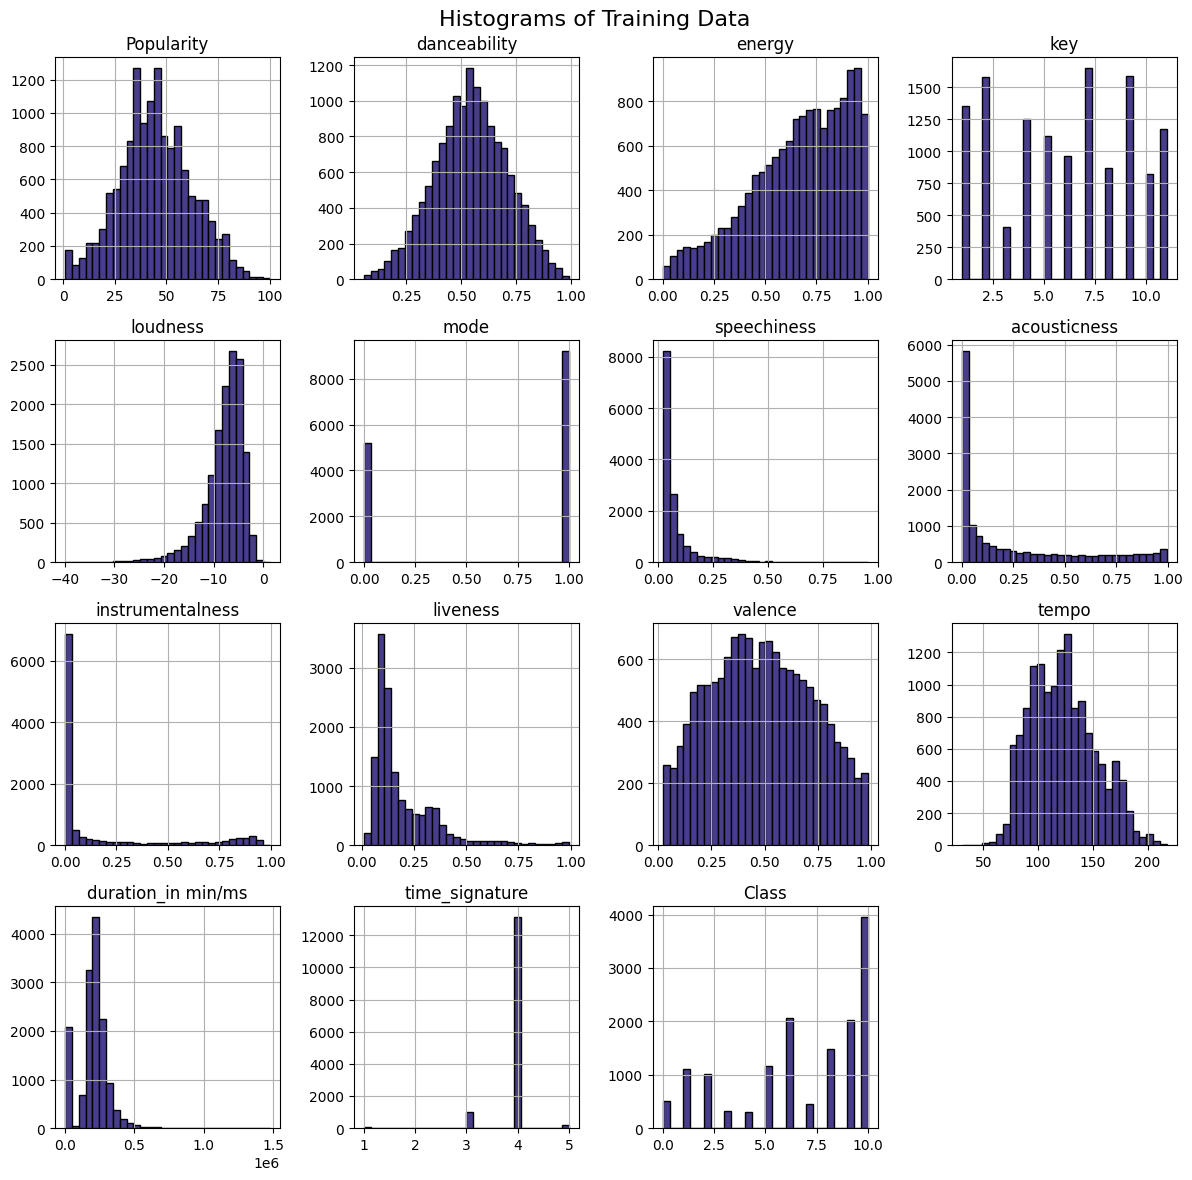

In [ ]:
train_plot=train.drop('Id',axis=1)

fig, ax = plt.subplots(figsize=(12, 12))
train_plot.hist(ax=ax, bins=30, edgecolor='black', color='darkslateblue')

# Set title and labels
plt.suptitle('Histograms of Training Data', fontsize=16)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()




In [ ]:
for col in train.select_dtypes(include=np.number).columns.tolist():
    fig = px.box(train,
        color = "Class",
        y = col,
        title = col
       )
    fig.show()

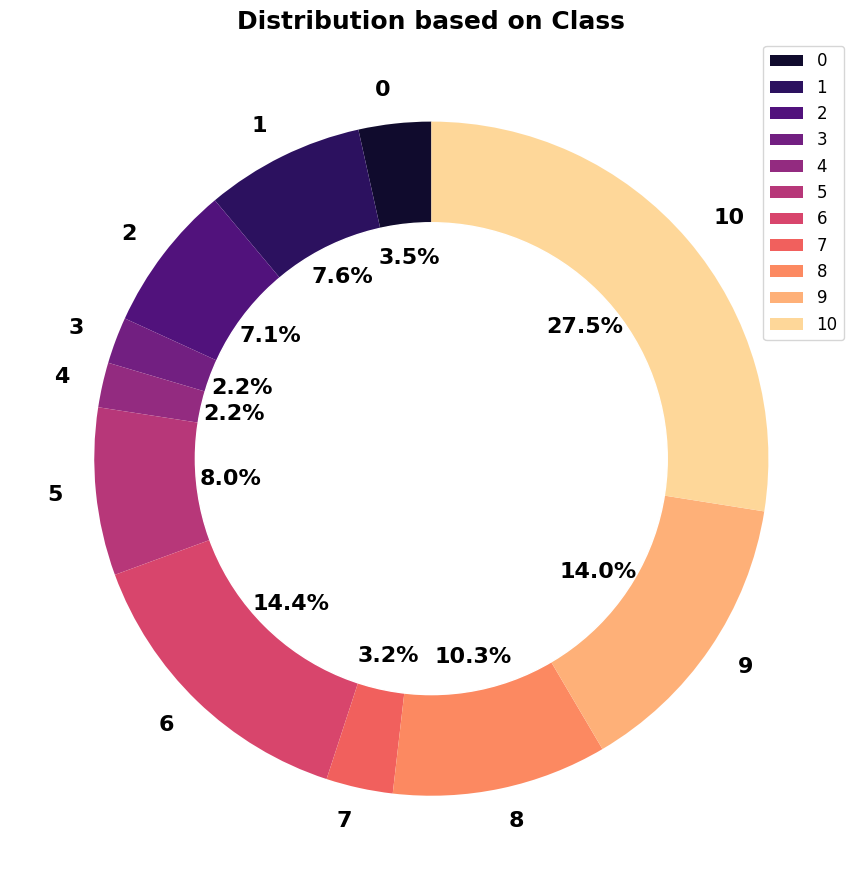

In [ ]:
import matplotlib.pyplot as plt

groupdata = train.groupby("Class").count()
x_vals = groupdata.index.tolist()
y_vals = groupdata.iloc[:, 0].tolist()

plt.figure(figsize=[15, 9])
colors = sns.color_palette("magma", len(x_vals))
plt.pie(y_vals, labels=x_vals, autopct='%1.1f%%', startangle=90, colors=colors,
        textprops={'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

plt.title("Distribution based on Class", fontsize=18, fontweight='bold')

# Add a shadow to the pie chart
plt.gca().set_aspect('equal')
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))

# Set the legend font size and position
plt.legend(fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()



<ipython-input-35-5ec113b320ff>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



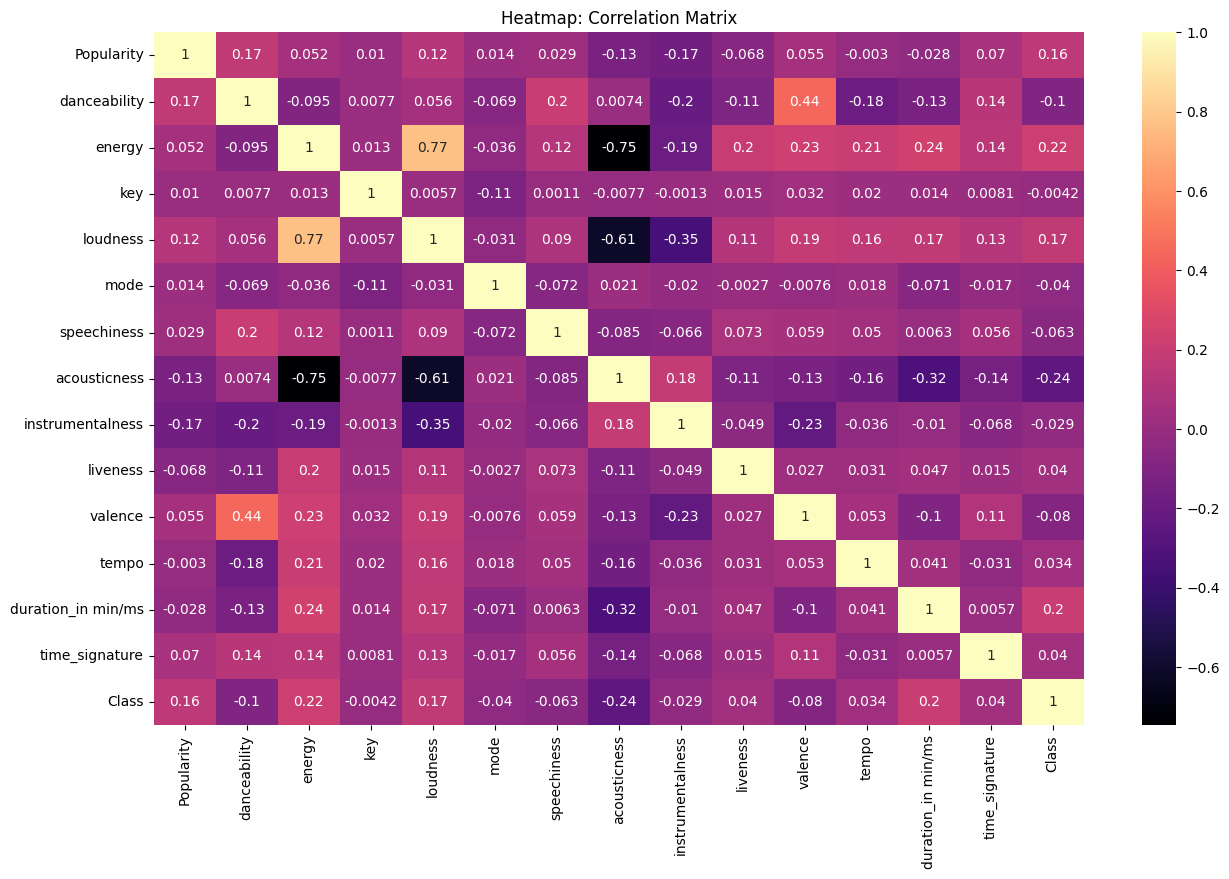

In [ ]:
# Heatmap: Correlation Matrix
plt.figure(figsize=(15, 9))
corr_matrix = train_plot.corr()
sns.heatmap(corr_matrix, annot=True, cmap="magma")
plt.title('Heatmap: Correlation Matrix')
plt.show()

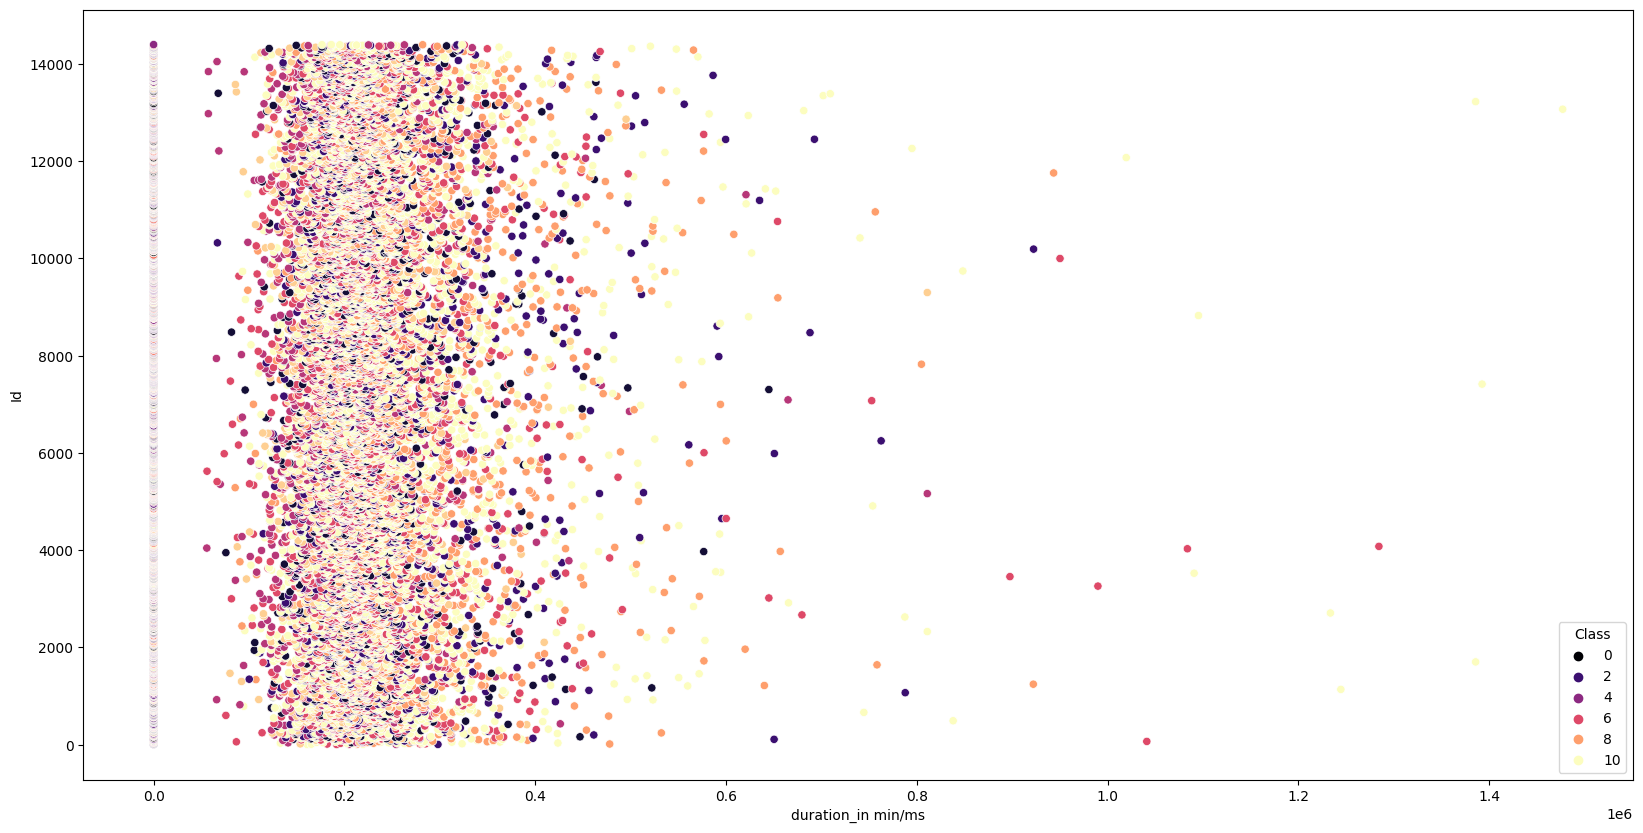

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=train,y='Id',x='duration_in min/ms',hue='Class', palette='magma')
plt.show()

## Data Preprocessingh

In [ ]:
train.drop(columns=["Id", "Track Name", "Artist Name"], inplace=True)

In [ ]:
test.drop(columns=["Id", "Track Name", "Artist Name"], inplace=True)

In [ ]:
#train.drop_duplicates() there is no duplicated values in dataset

In [ ]:
#test.drop_duplicates()

In [ ]:
#train['duration_min'] = train['duration_ms']/60000
#train.drop('duration_ms',axis=1,inplace=True)

In [ ]:
#test['duration_min'] = test['duration_ms']/60000
#tset.drop('duration_ms',axis=1,inplace=True)

In [ ]:
'''imputer = SimpleImputer(strategy="mean")
train = imputer.fit_transform(train)
test= imputer.transform(test)'''


<Axes: >

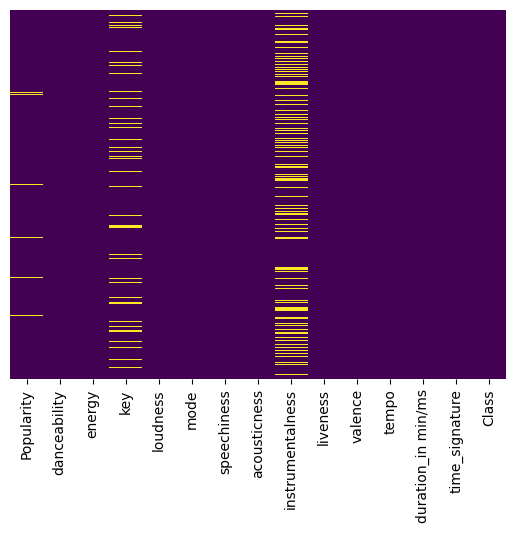

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train["Popularity"].fillna(train["Popularity"].mean(), inplace=True)
train["key"].fillna(train["key"].mode()[0], inplace=True)
train["instrumentalness"].fillna(0, inplace=True)


<Axes: >

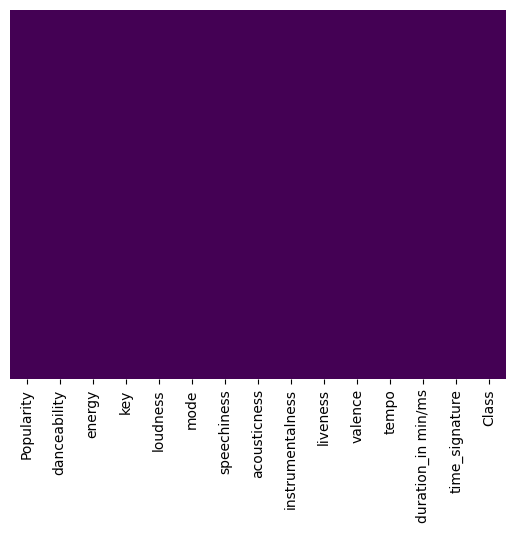

In [ ]:


sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')



In [1]:
# Feature engineering
'''train["popularity_energy_ratio"] = train["Popularity"] / train["energy"]
train["danceability_tempo_product"] = train["danceability"] * train["tempo"]
train['loudness_energy_ratio'] = train['loudness'] / train['energy']'''

'train["popularity_energy_ratio"] = train["Popularity"] / train["energy"]\ntrain["danceability_tempo_product"] = train["danceability"] * train["tempo"]\ntrain[\'loudness_energy_ratio\'] = train[\'loudness\'] / train[\'energy\']'

In [ ]:
'''test["popularity_energy_ratio"] = test["Popularity"] / test["energy"]
test["danceability_tempo_product"] = test["danceability"] * test["tempo"]
test['loudness_energy_ratio'] = test['loudness'] / test['energy']'''

'test["popularity_energy_ratio"] = test["Popularity"] / test["energy"]\ntest["danceability_tempo_product"] = test["danceability"] * test["tempo"]\ntest[\'loudness_energy_ratio\'] = test[\'loudness\'] / test[\'energy\']'

In [ ]:


'''X_train['loudness_energy_ratio'] = X_train['loudness'] / X_train['energy']
X_test['loudness_energy_ratio'] = X_test['loudness'] / X_test['energy']'''


In [ ]:
'''import numpy as np

Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_no_outliers = train[~((train< lower_bound) | (train > upper_bound)).any(axis=1)]
'''

In [ ]:
train.isna().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [ ]:
# Separate features and target variable
X = train.drop(columns=["Class"])
y = train["Class"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


<ipython-input-45-a88f0fa19bf0>:2: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



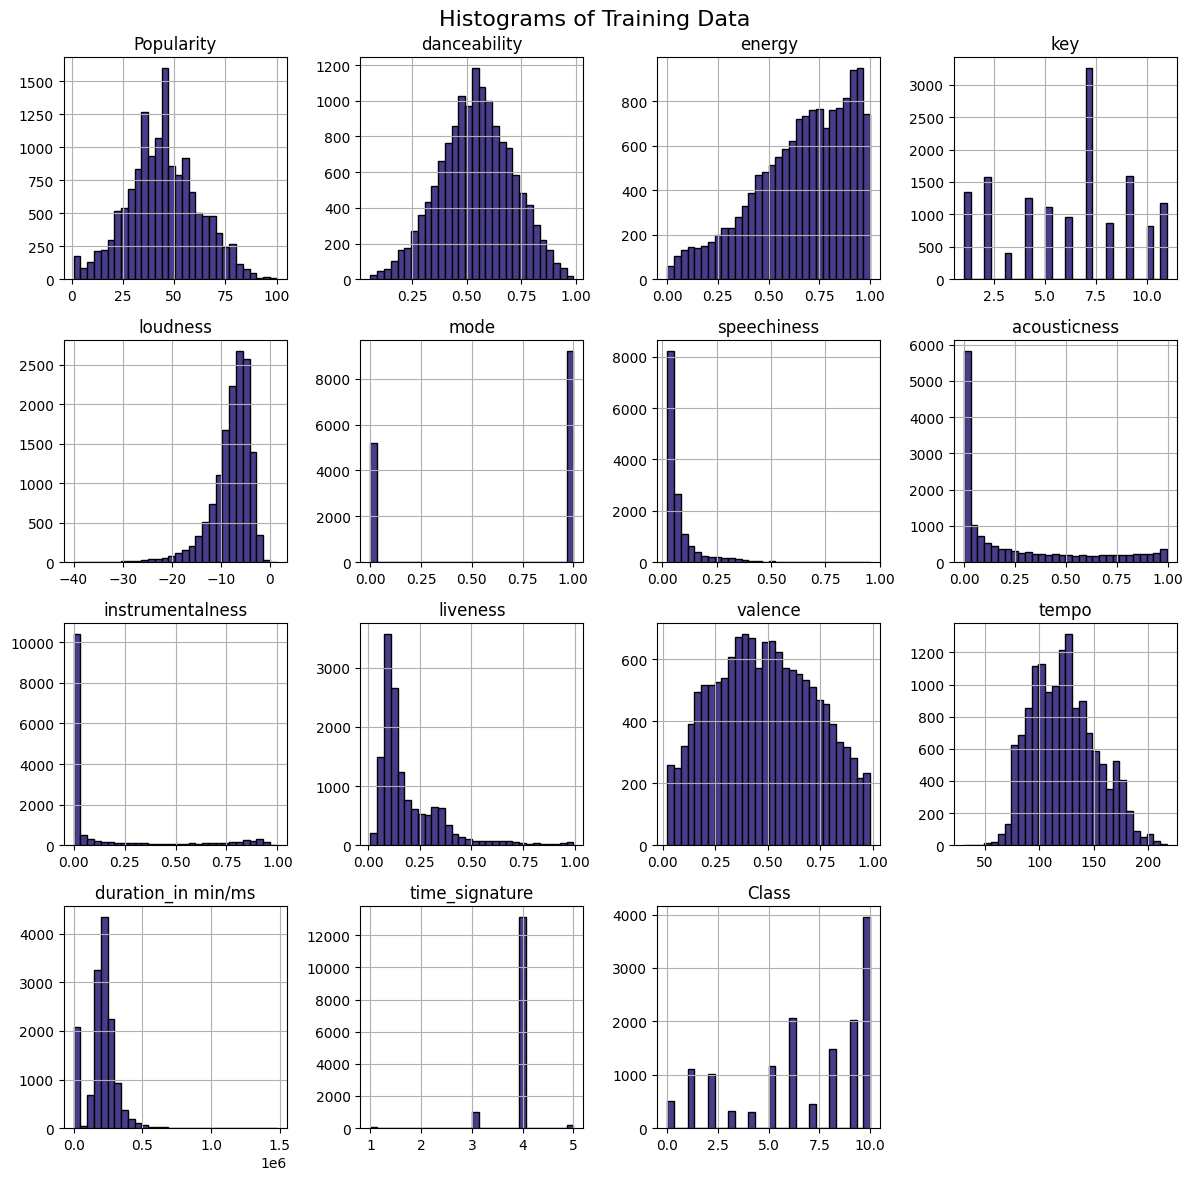

In [ ]:


fig, ax = plt.subplots(figsize=(12, 12))
train.hist(ax=ax, bins=30, edgecolor='black', color='darkslateblue')

# Set title and labels
plt.suptitle('Histograms of Training Data', fontsize=16)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## Scalling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)